In [2]:
import pandas as pd
from fyers_helper import prepare_data, load_stock_data
import datetime as dt

interval = "5"

nifty200_df = pd.read_csv('nifty200.csv')
tickers = [ f'NSE:{n}-EQ' for n in nifty200_df.Symbol.tolist()]

data_path = "../data5m"

end_date = dt.datetime.now()
start_date = dt.datetime(2015, 1, 1)

file_paths = prepare_data(tickers, interval, start_date=start_date, end_date=end_date, path=data_path, overwrite=False)
loaded_data_1D = load_stock_data(file_paths, data_path, interval)

df = pd.concat(loaded_data_1D, names=["Stock", "Date"]).reset_index()

Loading 5min data: 100%|██████████| 200/200 [00:00<00:00, 246.38it/s]


Params: max_positions=5, bb_period=60, bb_sd=1.76


Backtesting...:   0%|          | 0/7573 [00:00<?, ?it/s]

                      Metrics                    Values
0                      Period  2022-01-03 to 2022-05-31
1            Starting capital                    500000
2               Final capital                 479909.43
3                Total Trades                       834
4                     Winners                       553
5                      Losers                       281
6               Profit factor                  0.963245
7       Active Position Count                         5
8   Max holding period (days)                         6
9   Avg holding period (days)                         0
10               Win Rate (%)                 66.306954
11               Total Profit                 -20090.57
12                 Avg Profit                952.097957
13                   Avg Loss              -1945.198363
14            Total Brokerage                         0
15                  Total Tax                  32197.23
16                  Total MTF                   

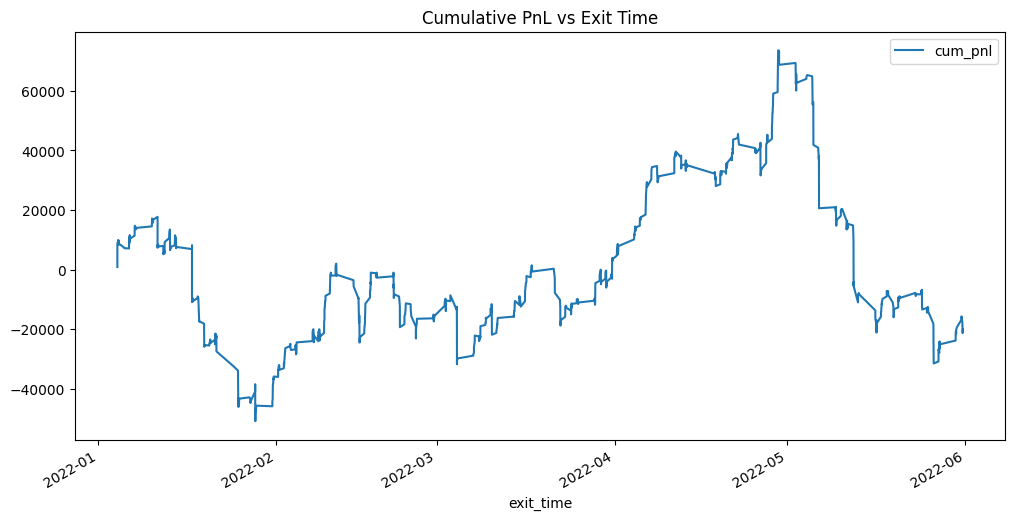

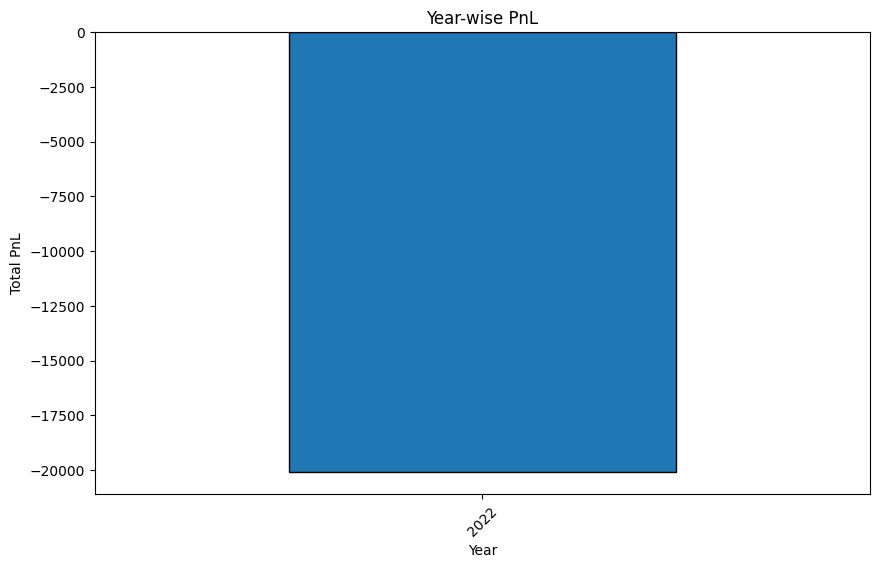

In [17]:
from lib import Bank, PositionManager, show_equity_curve
from bb_mean_rev import backtest

params = {
    'initial_capital': 500000,
    'max_positions': 5,
    'bb_period': 60,
    'bb_sd': 1.76,
    'start_date': '2022-01-01',
    'end_date': '2022-06-01',
}


bank = Bank(params['initial_capital'])
pm = PositionManager(bank, brokerage=0)

tearsheet, trades = backtest(df.copy(), pm, params, show_pb=True)
print(pd.DataFrame({
    "Metrics": tearsheet.keys(),
    "Values": tearsheet.values(),
}))
show_equity_curve(trades)